In [1]:
# slow down a bit when hacking something together, e.g. I forgot to add a simple function call 
# tuple unpacking is nice, but cannot be done in a nested list comprehension
# don't forget .items in  for k,v in dict.items()
# use hashlib for md5 encodings
# multiline list comprehensions don't need extra parentheses, but multiline if statements do
# np.clip min and max can be omitted by specifying None
# try except looks nice untill it obscures your real error
# parsing ints to ints instead of strings is really important
# checking whether someting is an int should be done with isinstance, not with isalpha() (fails on int)
# removing from a list while iterating can be done safely by iterating over a slice(?)
# with re make sure to use r'' literal strings
# read assignment before tinkering with networkx and discovering its not necessary
# sometimes a simple for loop works better then a list comprehension when parsing the input, and just add to concept variables
# for incrementing a string, you can use chr(ord(inp)+1)
# find repeating characters re.findall(r'([a-z])\1', password)
# regex: modify operator to nongreedy by appending ?
# ok so sometime you can bruteforce a problem....
# while manually modifying the input, make sure to change exactly the right line
# before doing bfs, check if the search space is not going to explode
# top 10 score by using a factors function!
# itertools.chain is nice for iterating over multiple iterables

In [2]:
from dataclasses import dataclass
from math import gcd, ceil
import re
from collections import Counter, defaultdict, namedtuple, deque
import itertools
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from collections import defaultdict
from itertools import permutations
import re

In [3]:
def data(filename='input', parser=str, sep='\n') -> list:
    "Split the day's input file into sections separated by `sep`, and apply `parser` to each."
    sections = open(f'{filename}.txt').read().rstrip().split(sep)
    return [parser(section) for section in sections]
lines = data('input', parser=str.split, sep='\n')
labels = {idx:''.join([str(idx)]+line) for idx, line in enumerate(lines)}

In [5]:
reg = {'a':0, 'b':0}
pnt = 0
from collections import defaultdict
edges = set()
for i in range(10000000000000000):
    prev = pnt
    cur = lines[pnt]
    ins, *arg = cur
    # print(pnt,ins, arg)
    if ins == 'hlf':
        reg[arg[0]] /= 2
        pnt += 1
    if ins == 'tpl':
        reg[arg[0]] *= 3
        pnt += 1
    if ins == 'inc':
        reg[arg[0]] += 1
        pnt += 1
    if ins == 'jmp':
        pnt += int(arg[0])
    if ins == 'jie':
        if reg[arg[0][0]] % 2 == 0:
            pnt += int(arg[1])
        else: 
            pnt += 1
    if ins == 'jio':
        if reg[arg[0][0]] == 1:
            pnt += int(arg[1])
        else: 
            pnt += 1
    edges.add((prev, pnt))

IndexError: list index out of range

In [6]:
reg

{'a': 1.0, 'b': 307}

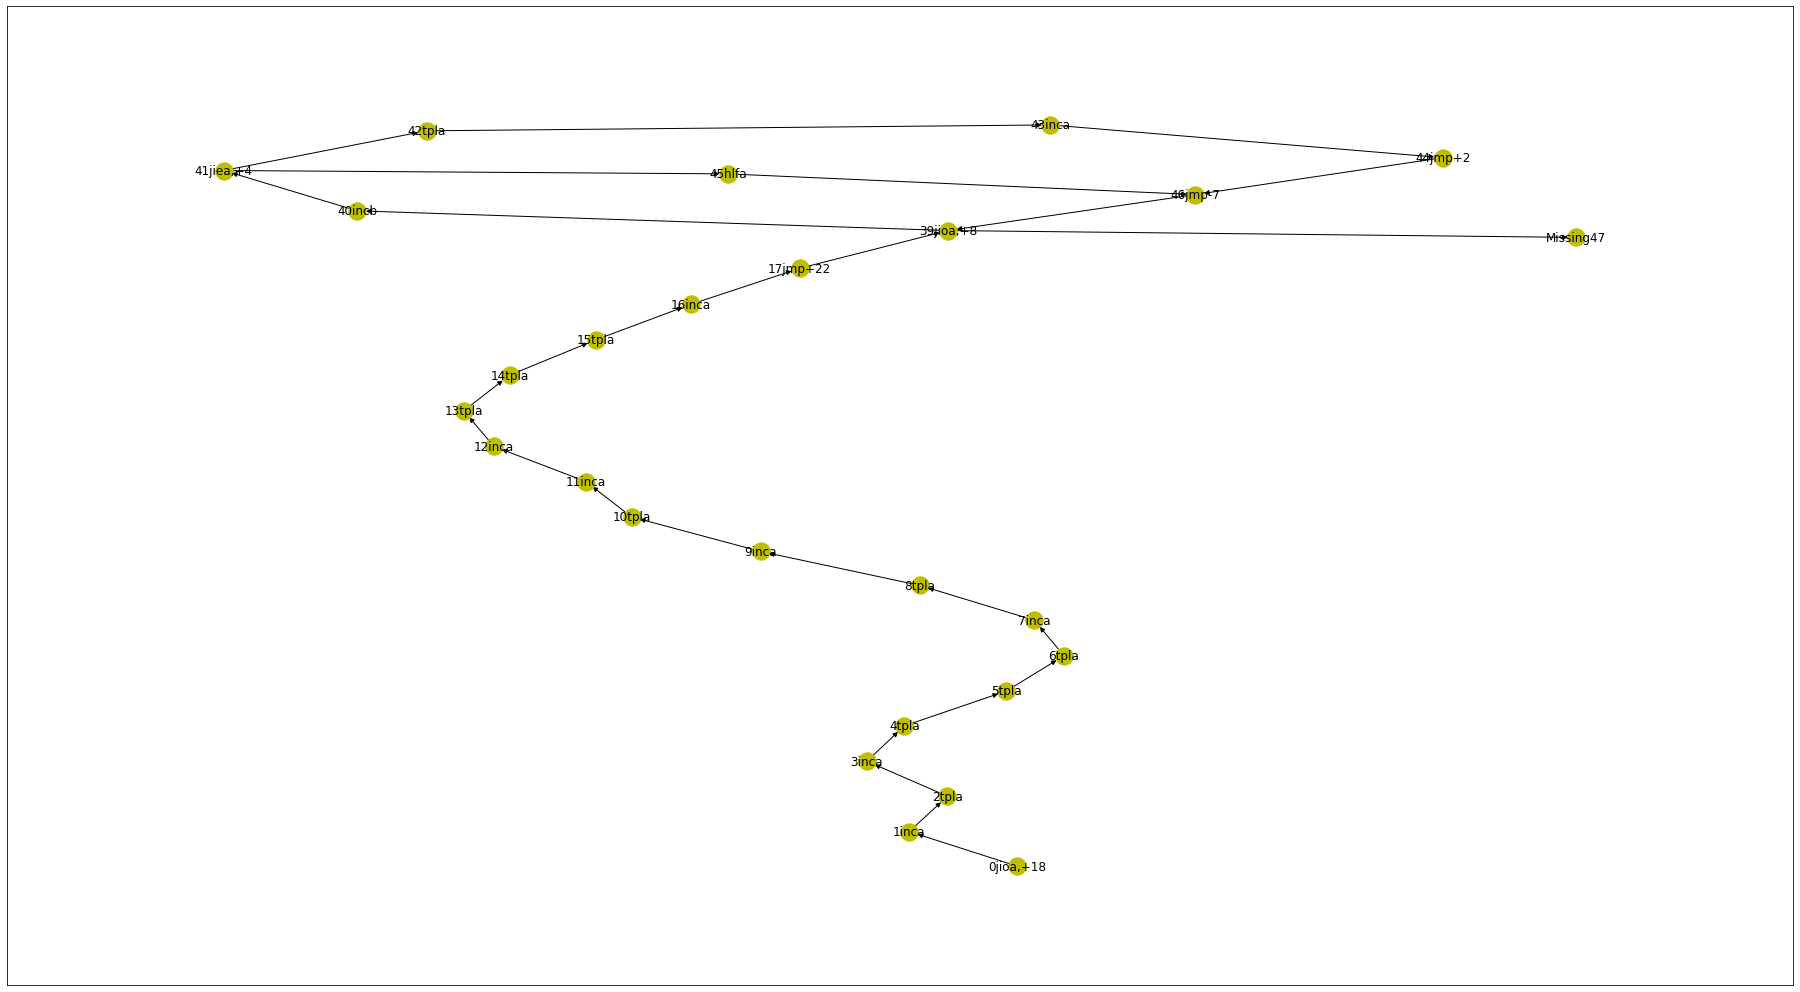

In [7]:
from aocutils.special import visualize_graph, labelize
visualize_graph(edges, labelize(lines))